# 드라이브 마운트

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 기본 라이브러리 설정

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정

In [ ]:
# 코랩에 폰트 설치하기
# 노트븍에 코랩에서 실행 중인지 체크 합니다.

import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family']


['NanumBarunGothic']

In [ ]:
#  폰트지정하기1 : 나눔고딕 폰트를 사용합니다.
plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# 폰트지정하기2 :  rc 함수로 family='NanumBarunGothic' 변경하기
plt.rc('font', family='NanumBarunGothic')

# 데이터 불러오기 & 정보 확인

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/미래인재-2학년2학기/loan_data.csv')
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
data.describe(include='object')

,person_gender,person_education,person_home_ownership,loan_intent,previous_loan_defaults_on_file
count,45000,45000,45000,45000,45000
unique,2,5,4,6,2
top,male,Bachelor,RENT,EDUCATION,Yes
freq,24841,13399,23443,9153,22858


In [ ]:
data['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


In [ ]:
data[data['loan_status'] == 1].head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1


In [ ]:
data[data['loan_status'] == 0].head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
14,23.0,female,Associate,138998.0,0,RENT,35000.0,EDUCATION,7.90,0.25,4.0,583,No,0
15,23.0,female,Master,600891.0,5,MORTGAGE,30000.0,DEBTCONSOLIDATION,10.65,0.05,3.0,670,Yes,0
16,23.0,male,Bachelor,144943.0,0,RENT,35000.0,EDUCATION,7.90,0.24,4.0,663,No,0
20,25.0,male,Bachelor,195718.0,0,RENT,35000.0,VENTURE,7.49,0.18,4.0,684,Yes,0


# 대출 상환 가능 여부 비율을 그래프로 시각화

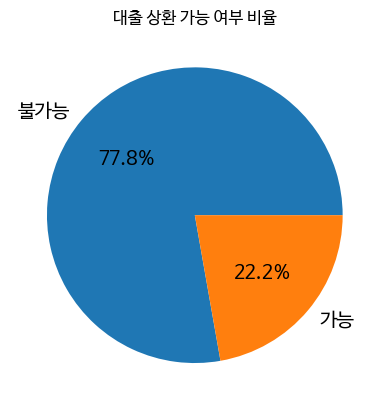

In [ ]:
plt.pie(
    data['loan_status'].value_counts(),
    labels=['불가능','가능'],
    autopct='%.1f%%',
    textprops={'fontsize': 14}
)
plt.title('대출 상환 가능 여부 비율')
plt.show()

# 이상치 확인

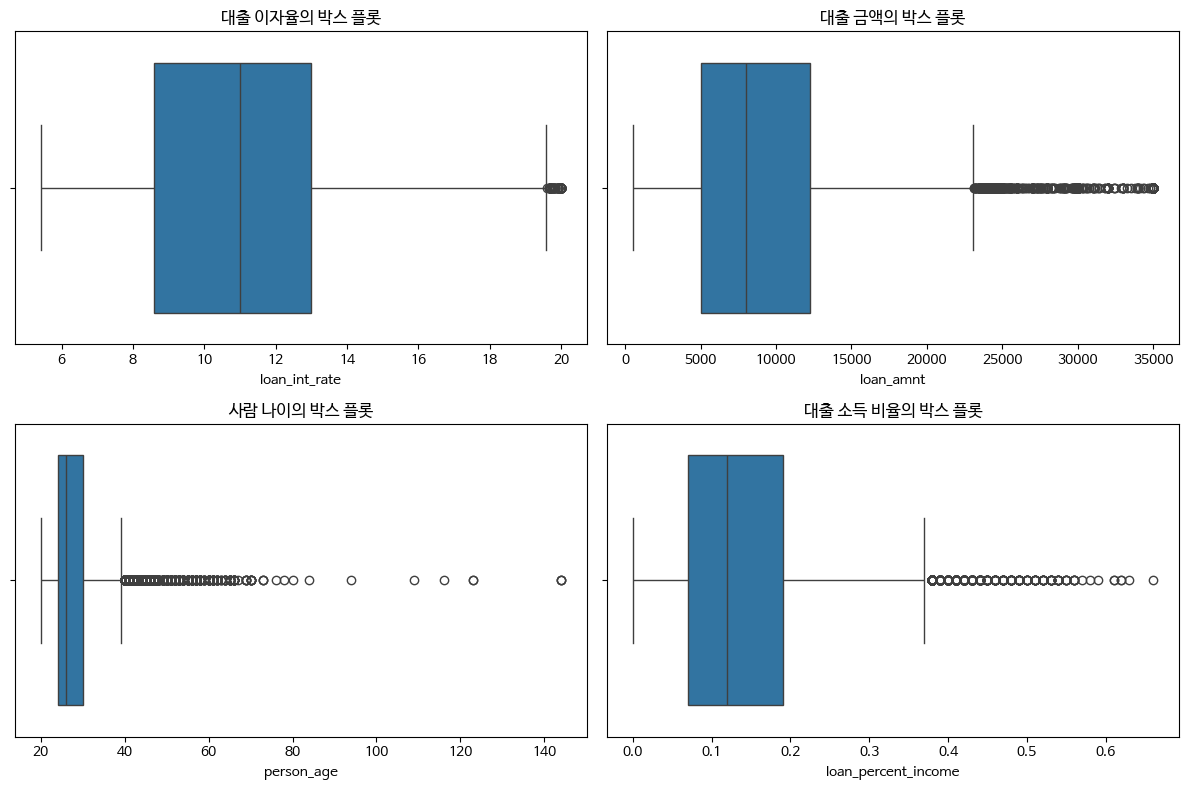

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['loan_int_rate'])
plt.title('대출 이자율의 박스 플롯')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['loan_amnt'])
plt.title('대출 금액의 박스 플롯')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['person_age'])
plt.title('사람 나이의 박스 플롯')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['loan_percent_income'])
plt.title('대출 소득 비율의 박스 플롯')

plt.tight_layout()
plt.show()

# 이상치 처리

In [ ]:
cols = ['person_age', 'loan_int_rate', 'loan_amnt','loan_percent_income', 'cb_person_cred_hist_length']
Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[cols] < (Q1 - 1.5 * IQR)) |(data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

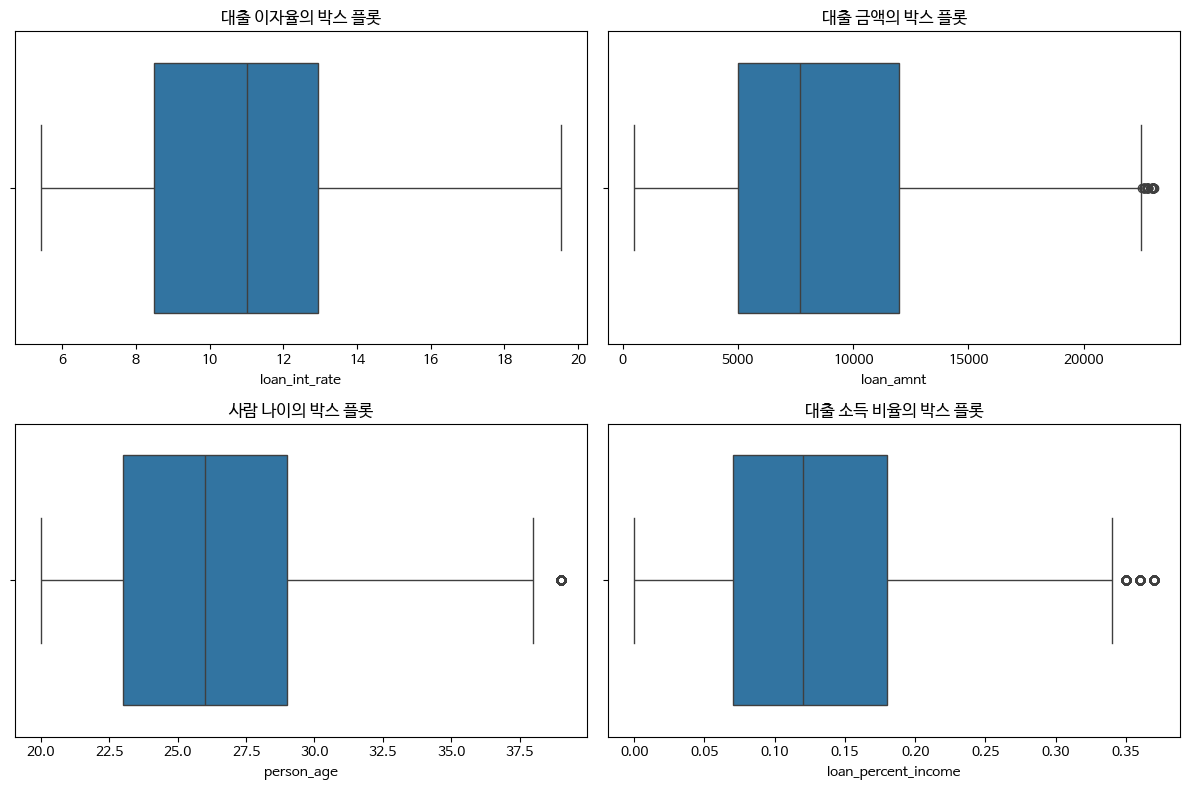

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['loan_int_rate'])
plt.title('대출 이자율의 박스 플롯')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['loan_amnt'])
plt.title('대출 금액의 박스 플롯')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['person_age'])
plt.title('사람 나이의 박스 플롯')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['loan_percent_income'])
plt.title('대출 소득 비율의 박스 플롯')

plt.tight_layout()
plt.show()

# 대출 상태별 범주형 컬럼들의 특징 시각화하기

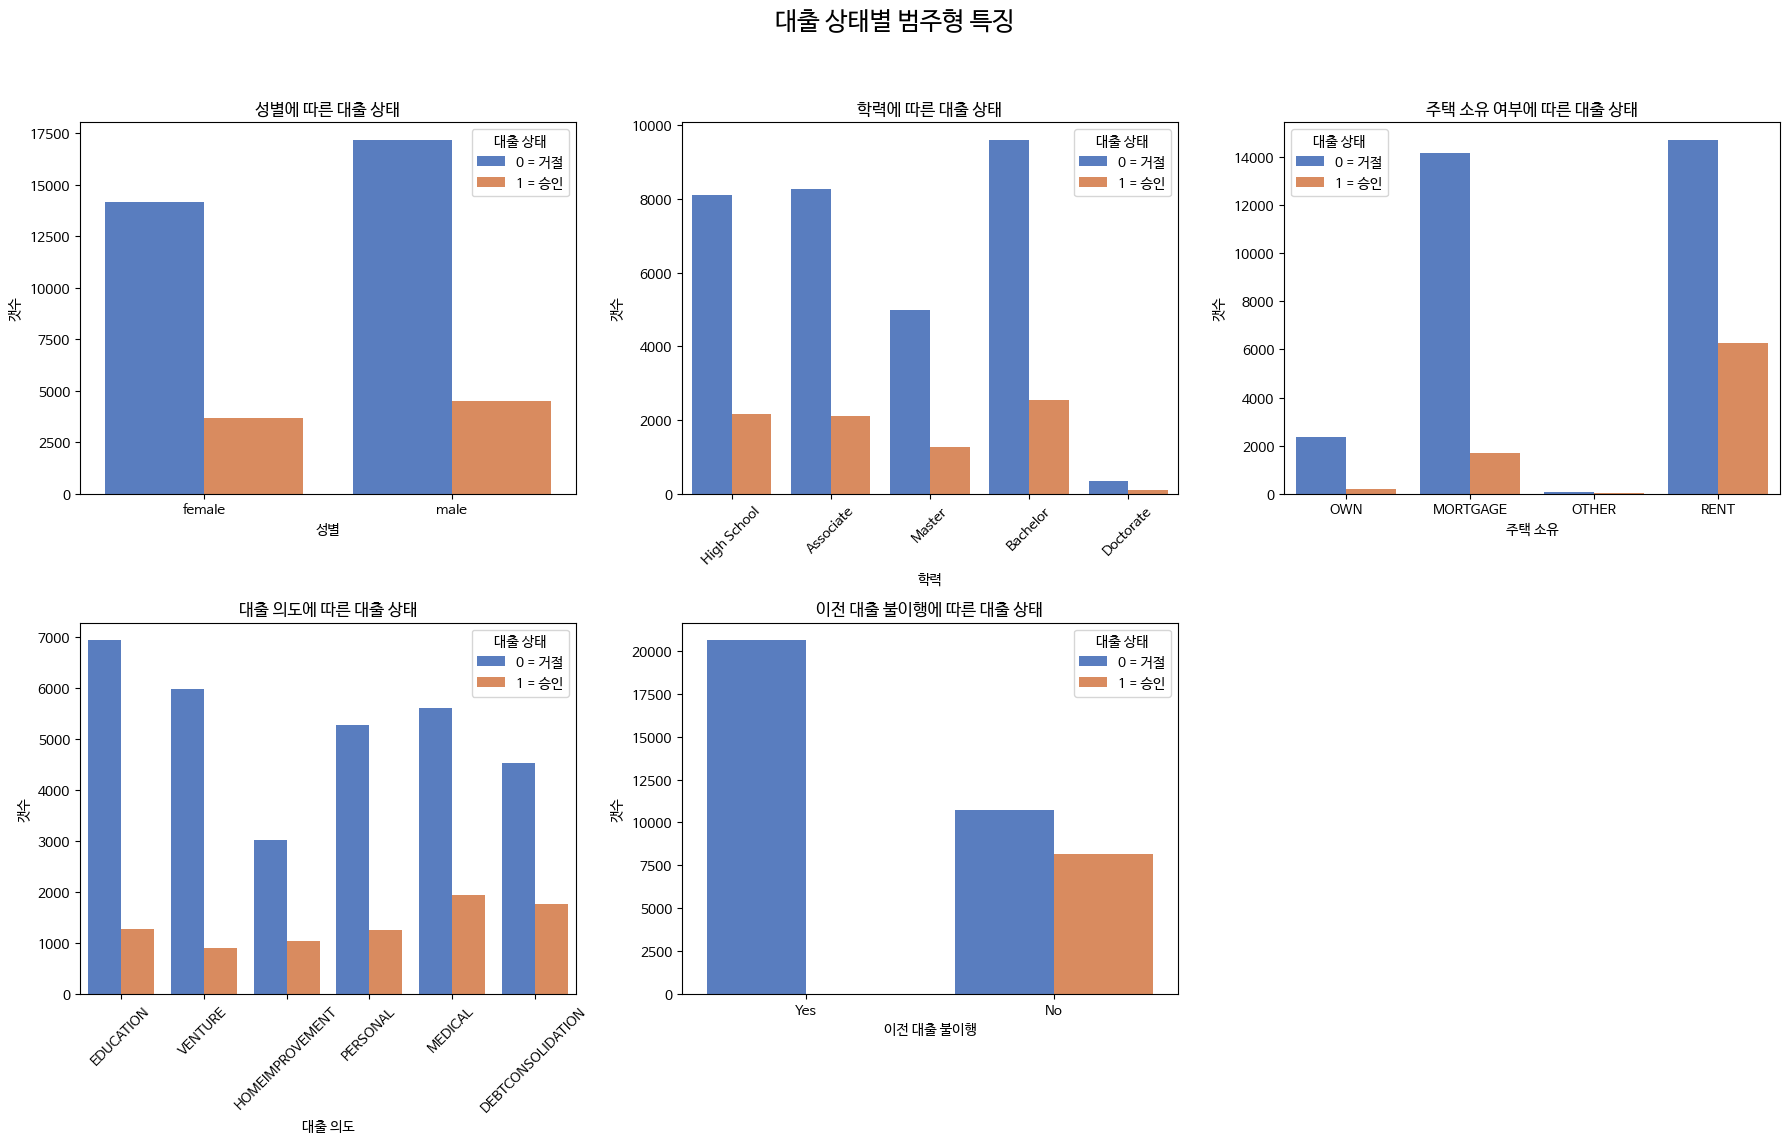

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("대출 상태별 범주형 특징", fontsize=18)

sns.countplot(data=data, x='person_gender', hue='loan_status', ax=axes[0, 0], palette='muted')
axes[0, 0].set_title("성별에 따른 대출 상태")
axes[0, 0].set_xlabel("성별")
axes[0, 0].set_ylabel("갯수")
axes[0, 0].legend(title='대출 상태', labels=['0 = 거절', '1 = 승인'])

sns.countplot(data=data, x='person_education', hue='loan_status', ax=axes[0, 1], palette='muted')
axes[0, 1].set_title("학력에 따른 대출 상태")
axes[0, 1].set_xlabel("학력")
axes[0, 1].set_ylabel("갯수")
axes[0, 1].legend(title='대출 상태', labels=['0 = 거절', '1 = 승인'])
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='person_home_ownership', hue='loan_status', ax=axes[0, 2], palette='muted')
axes[0, 2].set_title("주택 소유 여부에 따른 대출 상태")
axes[0, 2].set_xlabel("주택 소유")
axes[0, 2].set_ylabel("갯수")
axes[0, 2].legend(title='대출 상태', labels=['0 = 거절', '1 = 승인'])

sns.countplot(data=data, x='loan_intent', hue='loan_status', ax=axes[1, 0], palette='muted')
axes[1, 0].set_title("대출 의도에 따른 대출 상태")
axes[1, 0].set_xlabel("대출 의도")
axes[1, 0].set_ylabel("갯수")
axes[1, 0].legend(title='대출 상태', labels=['0 = 거절', '1 = 승인'])
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='previous_loan_defaults_on_file', hue='loan_status', ax=axes[1, 1], palette='muted')
axes[1, 1].set_title("이전 대출 불이행에 따른 대출 상태")
axes[1, 1].set_xlabel("이전 대출 불이행")
axes[1, 1].set_ylabel("갯수")
axes[1, 1].legend(title='대출 상태', labels=['0 = 거절', '1 = 승인'])

fig.delaxes(axes[1][2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 데이터 전처리: 비정형 데이터를 정형 데이터로

In [ ]:
data['person_gender'] = data['person_gender'].map({'female': 0, 'male': 1})

data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3,
                   'Master': 4, 'Doctorate': 5}
data['person_education'] = data['person_education'].map(education_order)
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

print(data.head())

    person_age  person_gender  person_education  person_income  \
1         21.0              0                 1        12282.0   
5         21.0              0                 1        12951.0   
9         21.0              0                 1        12739.0   
11        21.0              0                 2        13113.0   
19        24.0              0                 4        14283.0   

    person_emp_exp  loan_amnt  loan_int_rate  loan_percent_income  \
1                0     1000.0          11.14                 0.08   
5                0     2500.0           7.14                 0.19   
9                0     1600.0          14.74                 0.13   
11               0     4500.0           8.63                 0.34   
19               1     1750.0          10.99                 0.12   

    cb_person_cred_hist_length  credit_score  previous_loan_defaults_on_file  \
1                          2.0           504                               1   
5                          2

In [ ]:
median_age = data['person_age'].median()
data['person_age'] = data['person_age'].apply(lambda x: median_age if x > 100 else x)

In [ ]:
column = 'person_age'
title = column.replace('_', ' ')

print(f'\nSummary Statistics for {title}:\n', data[column].describe())


Summary Statistics for person age:
 count    39513.000000
mean        26.697087
std          4.151116
min         20.000000
25%         23.000000
50%         26.000000
75%         29.000000
max         39.000000
Name: person_age, dtype: float64


# 상관계수 히트맵

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


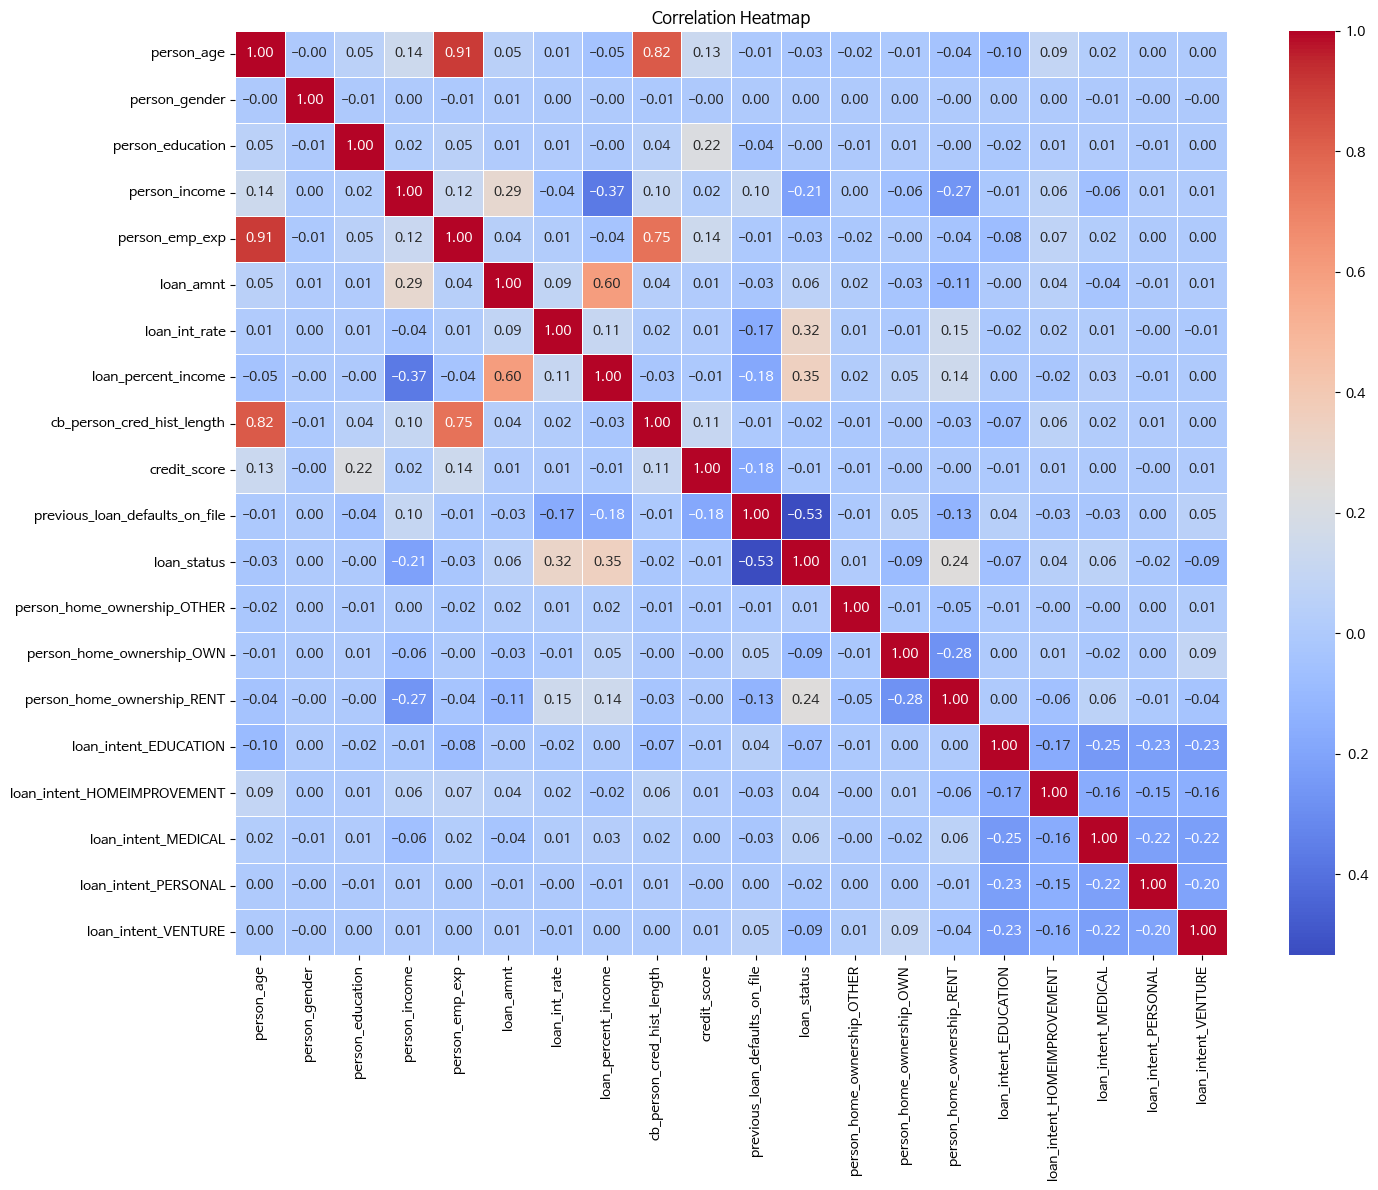

In [ ]:
corr_matrix = data.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


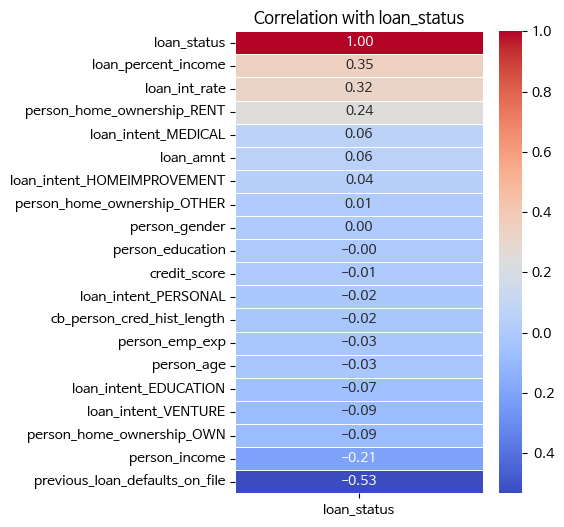

In [ ]:
target_variable = 'loan_status'
target_corr = corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

plt.figure(figsize=(4, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation with {target_variable}')
plt.show()

# 종속 변수와 독립 변수 선언

In [ ]:
X = data.drop(['loan_status'], axis=1)
y = data['loan_status']

display(X.head())
display(y.head())

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
1,21.0,0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,False,True,False,True,False,False,False,False
5,21.0,0,1,12951.0,0,2500.0,7.14,0.19,2.0,532,0,False,True,False,False,False,False,False,True
9,21.0,0,1,12739.0,0,1600.0,14.74,0.13,3.0,640,0,False,True,False,False,False,False,False,True
11,21.0,0,2,13113.0,0,4500.0,8.63,0.34,2.0,651,0,False,True,False,False,True,False,False,False
19,24.0,0,4,14283.0,1,1750.0,10.99,0.12,2.0,679,0,False,False,False,True,False,False,False,False


,loan_status
1,0
5,1
9,1
11,1
19,1


# 학습 데이터와 테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
!pip install catboost

# 여러 모델들 학습 및 예측
- Logistic Regression
- Random Forest
- XGBoost
- LightGBM
- CatBoost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(verbosity=-1, random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}

# Confusion Matrix

Logistic Regression의 분류 결과:

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6232
           1       0.77      0.73      0.75      1671

    accuracy                           0.90      7903
   macro avg       0.85      0.84      0.84      7903
weighted avg       0.90      0.90      0.90      7903



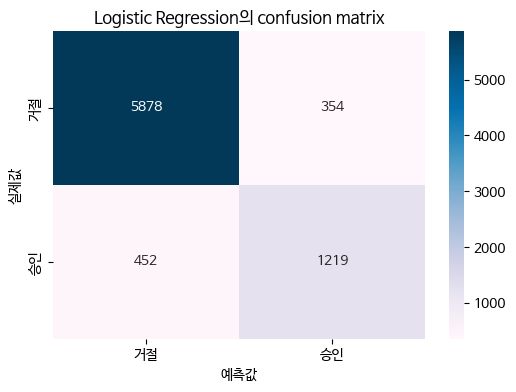



Random Forest의 분류 결과:

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6232
           1       0.89      0.74      0.81      1671

    accuracy                           0.93      7903
   macro avg       0.91      0.86      0.88      7903
weighted avg       0.92      0.93      0.92      7903



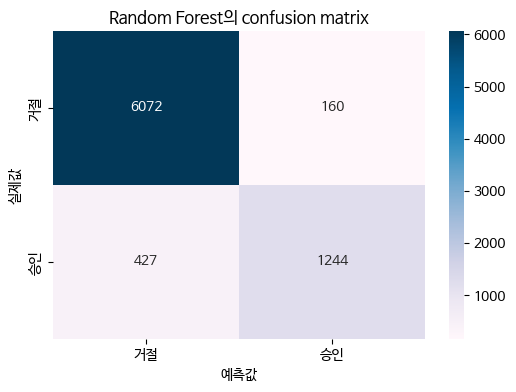

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:53:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost의 분류 결과:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6232
           1       0.87      0.78      0.82      1671

    accuracy                           0.93      7903
   macro avg       0.90      0.88      0.89      7903
weighted avg       0.93      0.93      0.93      7903



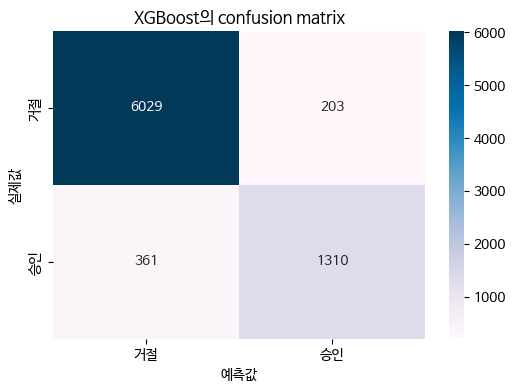



LightGBM의 분류 결과:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6232
           1       0.88      0.78      0.82      1671

    accuracy                           0.93      7903
   macro avg       0.91      0.87      0.89      7903
weighted avg       0.93      0.93      0.93      7903



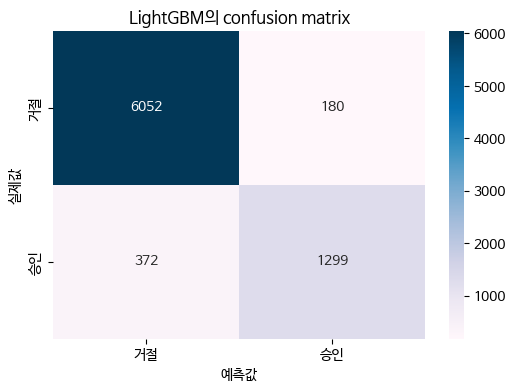



CatBoost의 분류 결과:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6232
           1       0.88      0.77      0.82      1671

    accuracy                           0.93      7903
   macro avg       0.91      0.87      0.89      7903
weighted avg       0.93      0.93      0.93      7903



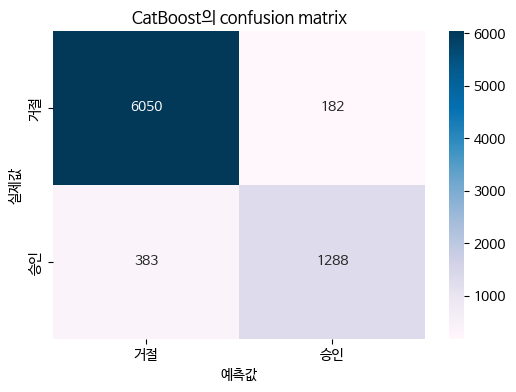



모델 성능 테이블:


,모델,훈련 점수,테스트 점수,정확도
0,Logistic Regression,0.898893,0.898013,0.898013
1,Random Forest,0.999968,0.925724,0.925724
2,XGBoost,0.972161,0.928635,0.928635
3,LightGBM,0.949130,0.930153,0.930153
4,CatBoost,0.955932,0.928508,0.928508


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
results = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_val, y_val)

    accuracy = accuracy_score(y_val, y_val_pred)

    results.append({
        '모델': name,
        '훈련 점수': train_score,
        '테스트 점수': test_score,
        '정확도': accuracy
    })

    print(f"{name}의 분류 결과:\n")
    print(classification_report(y_val, y_val_pred))

    cm = confusion_matrix(y_val, y_val_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='PuBu', xticklabels=['거절', '승인'], yticklabels=['거절', '승인'])
    plt.title(f'{name}의 confusion matrix')
    plt.xlabel('예측값')
    plt.ylabel('실제값')
    plt.show()

    print("\n" + "="*60 + "\n")

results_df = pd.DataFrame(results)

print("모델 성능 테이블:")
display(results_df)

In [ ]:
best_model_row = results_df.loc[results_df['정확도'].idxmax()]
best_model_name = best_model_row['모델']
best_model_accuracy = best_model_row['정확도']

print(f"\n최고의 모델: {best_model_name} (정확도: {best_model_accuracy:.4f})")


최고의 모델: LightGBM (정확도: 0.9302)


# 특성 중요도 구하기

<ipython-input-115-bb3cb56e405c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='중요도', y='특성', data=feature_importance_df, palette='viridis')


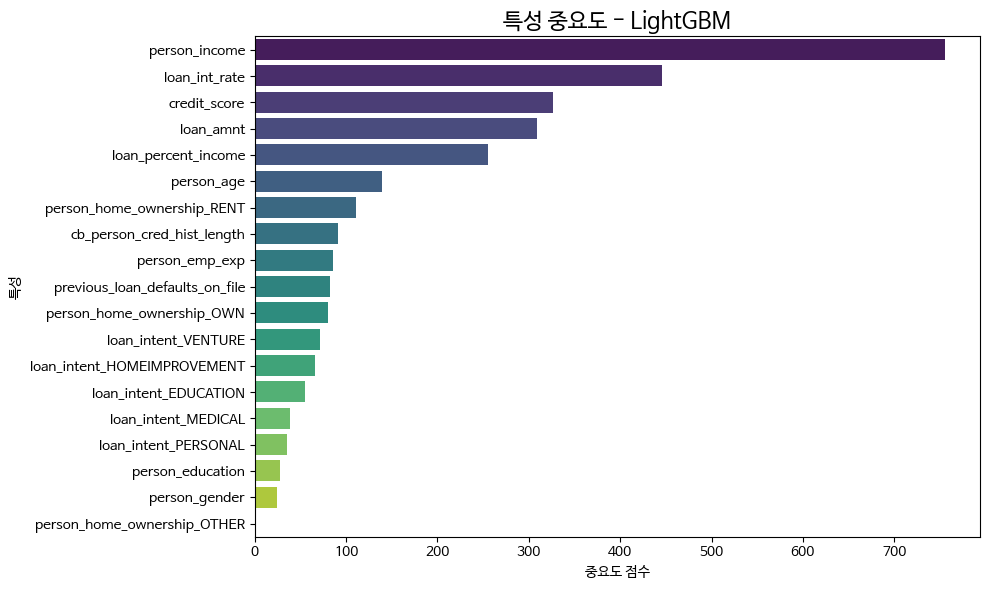

In [ ]:
best_model = models[best_model_name]

if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_

    feature_importance_df = pd.DataFrame({
        '특성': X.columns,
        '중요도': feature_importances
    }).sort_values(by='중요도', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='중요도', y='특성', data=feature_importance_df, palette='viridis')
    plt.title(f'특성 중요도 - {best_model_name}', fontsize=16)
    plt.xlabel('중요도 점수')
    plt.ylabel('특성')
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} 모델은 특성 중요도를 지원하지 않습니다.")